In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
print(sns.get_dataset_names())

In [2]:
tp=sns.load_dataset('tips')
tp.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# Reading of the columns name

In [4]:
tp.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [5]:
x=tp[['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']]
y=tp['tip']


In [6]:
x.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [15]:
tp.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [17]:
# transforming of columns string value into numeric value
# label encoder

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
sex_encoder=LabelEncoder()
time_encoder=LabelEncoder()
day_encoder=LabelEncoder()

In [23]:
import warnings
warnings.filterwarnings('ignore')
sex_encoder.fit(pd.DataFrame(x['sex']))
x['sex']=sex_encoder.transform(x['sex'])

In [25]:
x.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,No,Sun,Dinner,2
1,10.34,1.66,1,No,Sun,Dinner,3
2,21.01,3.50,1,No,Sun,Dinner,3
3,23.68,3.31,1,No,Sun,Dinner,2
4,24.59,3.61,0,No,Sun,Dinner,4


In [27]:
time_encoder.fit(pd.DataFrame(x['time']))
x['time']=time_encoder.transform(x['time'])

In [29]:
tp['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [31]:
x.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,No,Sun,0,2
1,10.34,1.66,1,No,Sun,0,3
2,21.01,3.50,1,No,Sun,0,3
3,23.68,3.31,1,No,Sun,0,2
4,24.59,3.61,0,No,Sun,0,4


In [34]:
day_encoder.fit(pd.DataFrame(x['day']))
x['day']=day_encoder.transform(x['day'])

In [36]:
x.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,No,2,0,2
1,10.34,1.66,1,No,2,0,3
2,21.01,3.50,1,No,2,0,3
3,23.68,3.31,1,No,2,0,2
4,24.59,3.61,0,No,2,0,4


In [38]:
x['day'].value_counts()

day
1    87
2    76
3    62
0    19
Name: count, dtype: int64

In [40]:
sex_encoder.fit(pd.DataFrame(x['sex']))
x['sex']=sex_encoder.transform(x['sex'])
time_encoder.fit(pd.DataFrame(x['time']))
x['time']=time_encoder.transform(x['time'])
day_encoder.fit(pd.DataFrame(x['day']))
x['day']=day_encoder.transform(x['day'])

In [42]:
x.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,No,2,0,2
1,10.34,1.66,1,No,2,0,3
2,21.01,3.50,1,No,2,0,3
3,23.68,3.31,1,No,2,0,2
4,24.59,3.61,0,No,2,0,4


In [44]:
x['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [46]:
x['smoker']=x['smoker'].map({'No':0,'Yes':1})

In [48]:
x.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [60]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [64]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((195, 7), (49, 7), (195,), (49,))

In [66]:
from sklearn.linear_model import LinearRegression

In [68]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [70]:
y_predict=model.predict(x_test)

In [72]:
df=pd.DataFrame(data=[y_predict,y_test])
df.T.head()

,0,1
0,3.18,3.18
1,2.00,2.00
2,2.00,2.00
3,5.16,5.16
4,2.00,2.00


<Axes: >

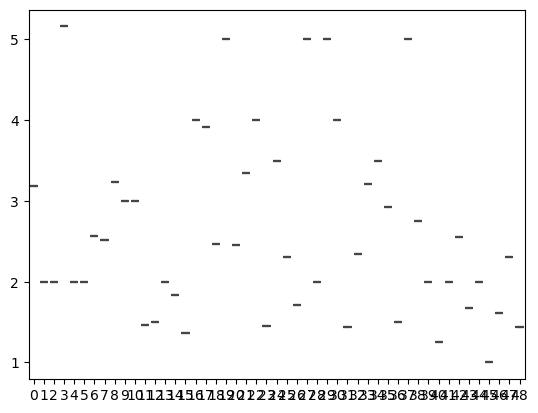

In [74]:
sns.boxplot(df)

In [75]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
count,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
mean,3.180000e+00,2.000000e+00,2.000000e+00,5.160000e+00,2.000000e+00,2.000000e+00,2.560000e+00,2.520000e+00,3.230000e+00,3.000000e+00,...,2.000000e+00,1.250000e+00,2.000000e+00,2.550000e+00,1.670000e+00,2.000000e+00,1.000000e+00,1.610000e+00,2.310000e+00,1.440000e+00
std,2.843558e-15,7.348033e-14,2.669342e-14,3.705950e-14,4.678876e-14,1.570092e-14,5.118598e-14,4.961492e-14,3.454203e-14,3.077381e-14,...,1.444485e-14,6.280370e-14,3.705418e-14,2.292550e-14,6.374575e-14,6.343174e-14,1.102205e-13,6.201885e-14,1.036737e-14,8.133079e-14
min,3.180000e+00,2.000000e+00,2.000000e+00,5.160000e+00,2.000000e+00,2.000000e+00,2.560000e+00,2.520000e+00,3.230000e+00,3.000000e+00,...,2.000000e+00,1.250000e+00,2.000000e+00,2.550000e+00,1.670000e+00,2.000000e+00,1.000000e+00,1.610000e+00,2.310000e+00,1.440000e+00
25%,3.180000e+00,2.000000e+00,2.000000e+00,5.160000e+00,2.000000e+00,2.000000e+00,2.560000e+00,2.520000e+00,3.230000e+00,3.000000e+00,...,2.000000e+00,1.250000e+00,2.000000e+00,2.550000e+00,1.670000e+00,2.000000e+00,1.000000e+00,1.610000e+00,2.310000e+00,1.440000e+00
50%,3.180000e+00,2.000000e+00,2.000000e+00,5.160000e+00,2.000000e+00,2.000000e+00,2.560000e+00,2.520000e+00,3.230000e+00,3.000000e+00,...,2.000000e+00,1.250000e+00,2.000000e+00,2.550000e+00,1.670000e+00,2.000000e+00,1.000000e+00,1.610000e+00,2.310000e+00,1.440000e+00
75%,3.180000e+00,2.000000e+00,2.000000e+00,5.160000e+00,2.000000e+00,2.000000e+00,2.560000e+00,2.520000e+00,3.230000e+00,3.000000e+00,...,2.000000e+00,1.250000e+00,2.000000e+00,2.550000e+00,1.670000e+00,2.000000e+00,1.000000e+00,1.610000e+00,2.310000e+00,1.440000e+00
max,3.180000e+00,2.000000e+00,2.000000e+00,5.160000e+00,2.000000e+00,2.000000e+00,2.560000e+00,2.520000e+00,3.230000e+00,3.000000e+00,...,2.000000e+00,1.250000e+00,2.000000e+00,2.550000e+00,1.670000e+00,2.000000e+00,1.000000e+00,1.610000e+00,2.310000e+00,1.440000e+00


In [76]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error,r2_score

In [80]:
score=r2_score(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
print("R2 Score is",score)
print("Mean absolute error is ",mae)
print("means squared error is ",mse)

R2 Score is 1.0
Mean absolute error is  6.606959877157054e-14
means squared error is  7.325875527950762e-27


In [82]:
import joblib

In [84]:
joblib.dump(model,'tp_model.pkl')

['tp_model.pkl']

In [86]:
from flask import Flask
from flask import render_template
from flask import request
import joblib

In [88]:
apps=Flask(__name__)
model=joblib.load('tp_model.pkl')
@apps.route('/')
def hello(name=None):
    return render_template('index.html',name=name)

@apps.route('/result',methods=['GET','POST'])
def get_value():
    if request.method=="POST":
        t1.bill=request.form.get('t1.bill')
        sex=request.form.get('sex')
        smoker=request.form.get('smoker')
        day=request.form.get('day')
        time=request.form.get('time')
        size=request.form.get('size')
        predict=model.predict([[t1_bill,sex,smoker,day,time,size]])
        print(predict[0])
    return render_template('result.html',prediction=[predict[0]])

In [ ]:
if __name__=="__main__":
    apps.run()    

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
